# Understanding User Engagement Patterns and Perform Churn Analysis 

## Context - - Digital Classroom Platform

Rocket Learning platform is designed to engage primary school kids in daily learning activities. It provide byte-sized, audio-visual, and gamified lessons to parents on WhatsApp group based digital classrooms. The core of their engagement model is based on `daily interaction`. It send activities to parents every day and measure their engagement through responses to the learning activities. 


## Problem Statement

RL have observed that after an initial phase of active engagement, a significant number of users tend to drop off and become less responsive over time. Their user base exhibits varied patterns of engagement; for eg - some remain consistently active, engaging with content almost daily, while others show diminishing activity.

To delve into this issue, they have provided me with a dataset that records user interactions. This dataset offers a granular view of user activity over time. Each row corresponds to a message sent by a user in the digital classroom. They want me to analyze this data to find user engagement patterns and derive actionable insights that could be helpful in identifying the problem in depth. 


## Understanding the Data


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

In [2]:
# Importing data
data = pd.read_excel("PA_Dataset.xlsx")

# Data Preview
data.sample(10)

,guardian_unique_id,sent_time,message_type
34944,guard_1193,29-10-2023 14:32:48,Image
33329,guard_635,27-10-2023 15:53:05,Image
18258,guard_614,12-10-2023 11:24:43,Image
30687,guard_817,24-10-2023 08:52:10,Image
71100,guard_2538,22-12-2023 19:29:33,Image
70112,guard_1012,21-12-2023 11:08:48,Image
50272,guard_2473,21-11-2023 12:59:33,Video
10708,guard_849,02-10-2023 14:39:27,Image
11811,guard_957,04-10-2023 15:43:29,Image
58290,guard_2275,03-12-2023 22:41:08,Image


Note: `sample()` displays the randomly selected items rows of the dataset. Thus helps in overall better understanding of data as compared to `head()`that displays the first few rows of the dataset.

In [4]:
# Data size
data.shape

(76155, 3)

Note: Dataset Details

We have 76155 rows and 3 columns. Further, the dataset provided includes:

* guardian_unique_id: This column corresponds to different unique ids used to represent users
* sent_time: This column provides details into the time and date of a message (reply) being sent to us, which can be used as a proxy for being active for that day.
* message_type: The type of message sent by the user

In [5]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76155 entries, 0 to 76154
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   guardian_unique_id  76155 non-null  object
 1   sent_time           76155 non-null  object
 2   message_type        76155 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
# Converting `sent_time` to datetime datatype
data['sent_time'] = pd.to_datetime(data['sent_time'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76155 entries, 0 to 76154
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   guardian_unique_id  76155 non-null  object        
 1   sent_time           76155 non-null  datetime64[ns]
 2   message_type        76155 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


Note: Now we can extract important parameters from datetime column.

In [8]:
print("Total duplicate values are '", data.duplicated().sum(), "'.")

Total duplicate values are ' 1197 '.


In [9]:
# Selecting duplicate rows except first
# occurrence based on all columns
data[data.duplicated()]

,guardian_unique_id,sent_time,message_type
8,guard_5,2023-03-09 11:53:05,Image
10,guard_5,2023-03-09 11:53:06,Image
11,guard_5,2023-03-09 11:53:06,Image
13,guard_5,2023-03-09 11:53:07,Image
15,guard_5,2023-03-09 11:53:08,Image
...,...,...,...
75523,guard_3683,2023-12-30 20:07:03,Image
75526,guard_3683,2023-12-30 20:07:04,Image
75565,guard_2334,2023-12-30 20:42:18,Image
75897,guard_3491,2023-12-31 15:16:10,Image


In [10]:
# Let's remove the duplicated rows to avoid any replication of data to meet specific analytical or processing requirements.
# Drop duplicates and reset index
cleaned_data = data.drop_duplicates(keep='first').reset_index(drop=True)
cleaned_data.shape

(74958, 3)

In [11]:
cleaned_data.head(10)

,guardian_unique_id,sent_time,message_type
0,guard_0,2023-01-09 17:16:43,Video
1,guard_1,2023-01-09 21:24:28,Chat
2,guard_2,2023-02-09 18:56:44,Chat
3,guard_3,2023-02-09 20:10:43,Video
4,guard_1,2023-02-09 21:09:56,Chat
5,guard_4,2023-02-09 21:15:51,Chat
6,guard_5,2023-03-09 11:53:04,Image
7,guard_5,2023-03-09 11:53:05,Image
8,guard_5,2023-03-09 11:53:06,Image
9,guard_5,2023-03-09 11:53:07,Image


## Data Preprocessing


In [12]:
cleaned_data['date'] = cleaned_data['sent_time'].dt.date  # Create a new column for the date
# Extracting additional columns
cleaned_data['hour'] = cleaned_data['sent_time'].dt.hour  # Hour of the day
cleaned_data['day_of_week'] = cleaned_data['sent_time'].dt.day_of_week  # Day of the week (Monday is 0 and Sunday is 6)
cleaned_data['day'] = cleaned_data['sent_time'].dt.day  # Day of the month
cleaned_data['month'] = cleaned_data['sent_time'].dt.month  # Month
cleaned_data['year'] = cleaned_data['sent_time'].dt.year  # Year
cleaned_data['is_weekend'] = cleaned_data['sent_time'].dt.weekday // 5  # Binary indicator for the weekend (1 if Saturday or Sunday, 0 otherwise)

In [23]:
cleaned_data.head(553)

,guardian_unique_id,sent_time,message_type,date,hour,day_of_week,day,month,year,is_weekend
0,guard_0,2023-01-09 17:16:43,Video,2023-01-09,17,0,9,1,2023,0
1,guard_1,2023-01-09 21:24:28,Chat,2023-01-09,21,0,9,1,2023,0
2,guard_2,2023-02-09 18:56:44,Chat,2023-02-09,18,3,9,2,2023,0
3,guard_3,2023-02-09 20:10:43,Video,2023-02-09,20,3,9,2,2023,0
4,guard_1,2023-02-09 21:09:56,Chat,2023-02-09,21,3,9,2,2023,0
...,...,...,...,...,...,...,...,...,...,...
548,guard_227,2023-09-13 21:52:59,Image,2023-09-13,21,2,13,9,2023,0
549,guard_227,2023-09-13 21:53:58,Chat,2023-09-13,21,2,13,9,2023,0
550,guard_228,2023-09-13 22:20:31,Chat,2023-09-13,22,2,13,9,2023,0
551,guard_228,2023-09-13 22:21:37,Chat,2023-09-13,22,2,13,9,2023,0


## Exploratory Analysis and Visualization


In [21]:
# Importing viz libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Analyzing Daily Engagement Pattern

To identify overall patterns in user engagement, including peak and off-peak periods.

In [16]:
daily_engagement = cleaned_data.groupby('date').size().reset_index(name='daily_engagement')

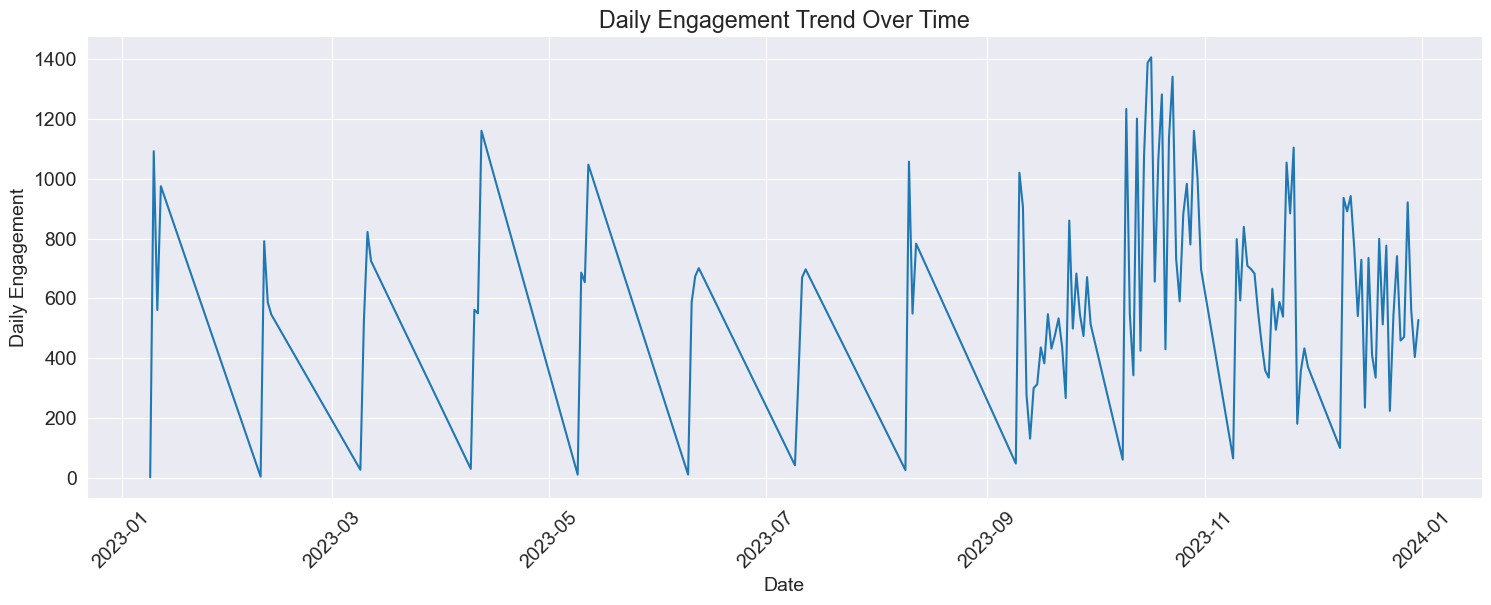

In [26]:
# Visualization: Plot the daily engagement trend over time
plt.plot(daily_engagement['date'], daily_engagement['daily_engagement'], linestyle='-')
plt.title('Daily Engagement Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Engagement')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Note: To Calculate Daily Engagement: I had Grouped the data by date and count the number of messages each day.

-- For the daily engagement trend plot over time.

Here's a breakdown of conclusions made from the Visualization:

1. Overall Trend:

* The overall trend in daily engagement exhibits fluctuations over time, characterized by significant spikes and dips.

2. Quarterly Analysis:

* Notable drops in daily engagement are observed during the first three quarters.
* There's a pattern of longer recovery periods after these drops.

3. Recent Improvement:

* In the fourth quarter, there's evidence of specific days or weeks with consistently high or low engagement.
* This suggests a recent improvement or change in user engagement patterns.

### Analyzing Monthly Engagement Pattern

To identify overall patterns in user engagement, including peak and off-peak months.

In [31]:
monthly_engagement = cleaned_data.groupby('month').size().reset_index(name='monthly_engagement')

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


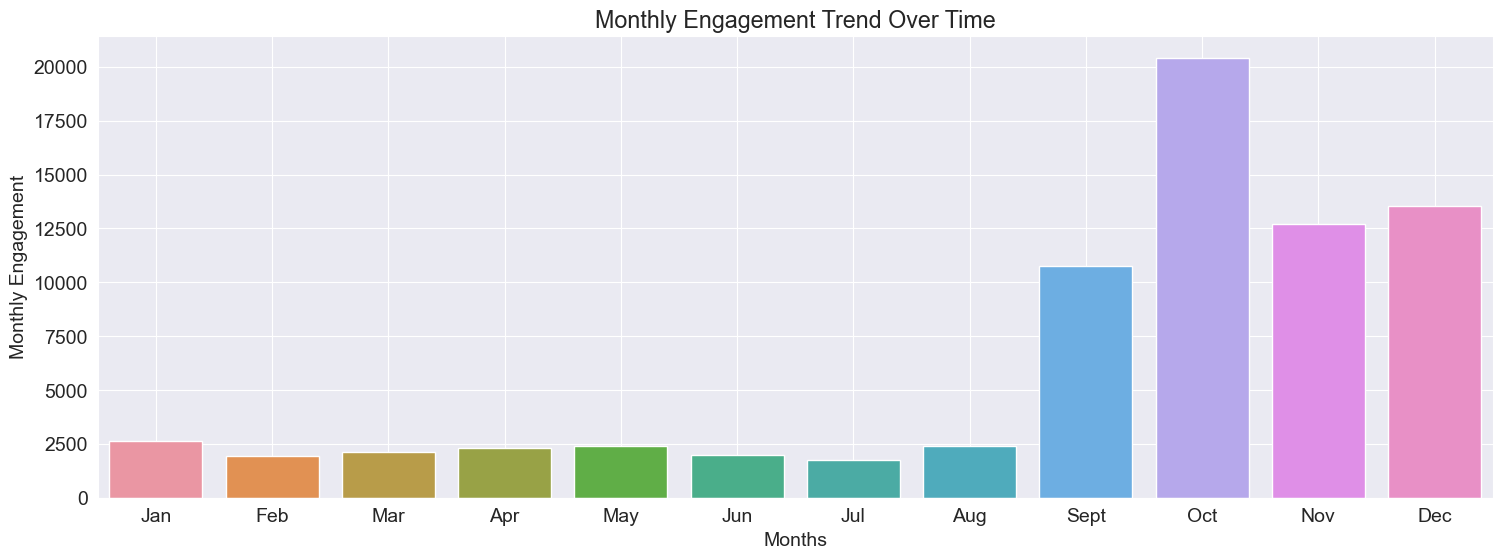

In [37]:
# Visualization: Plot the daily engagement trend over time
sns.barplot(monthly_engagement['month'], monthly_engagement['monthly_engagement'])
plt.title('Monthly Engagement Trend Over Time')
plt.xlabel('Months')
plt.ylabel('Monthly Engagement')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Note: To Calculate Monthly Engagement: I had Grouped the data by date and count the number of messages each month.

-- For the monthly engagement trend plot over time.

Here's a breakdown of conclusions made from the Visualization:

1. Overall Trend:

* The overall trend in monthly engagement exhibits fluctuations over time, especially for first three quaters characterized by bars of varying lengths.

2. Monthly Analysis:

* There is a notable increase in monthly engagement during September and specifically for October.
* Further investigation is needed to understand the potential reasons for this increase. It could be influenced by specific events, campaigns, or changes in content strategy during these months.

3. Recent Improvement:

* In the fourth quarter, there's evidence of recent improvement or change in user engagement patterns.
* To uncover the reasons behind this improvement, I need to explore any changes in the platform, content, or user engagement strategies during this period.

### Analyzing Weekly Engagement Patterns


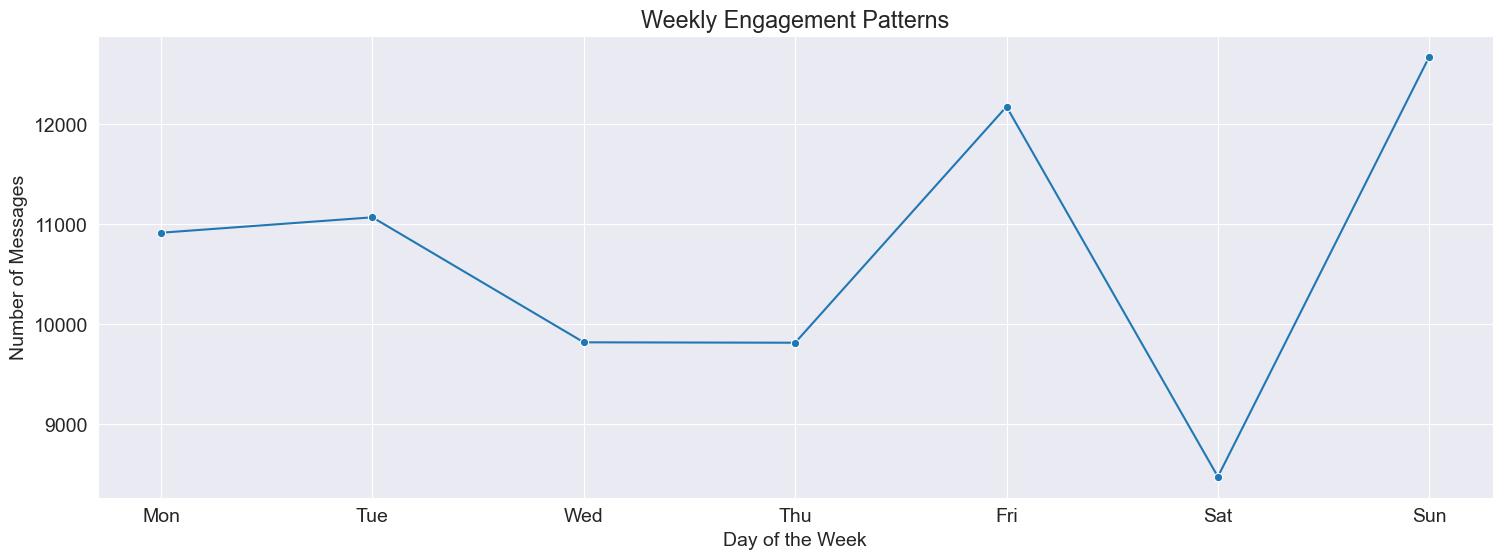

In [39]:
weekly_engagement = cleaned_data.groupby('day_of_week').size().reset_index(name='weekly_engagement')  # Group data by day of the week and count messages

# Visualization: Examine weekly engagement patterns through a line chart
sns.lineplot(x='day_of_week', y='weekly_engagement', data=weekly_engagement, marker='o')
plt.title('Weekly Engagement Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

Note: To Calculate Weekly Engagement: I had Grouped the data by day_of_week to get the count of the number of messages each day.

-- For the weekly engagement trend plot over time.

Here's a breakdown of conclusions made from the Visualization:

1. Higher Engagement Days:

Monday, Tuesday, Friday, and Sunday exhibit better engagement.

2. Moderate Engagement Days:

Wednesday and Thursday have moderate engagement.

3. Lowest Engagement Day:

Saturday has the least number of engagements.

### Analyzing Time-of-Day Engagement on Higher Engagement Days


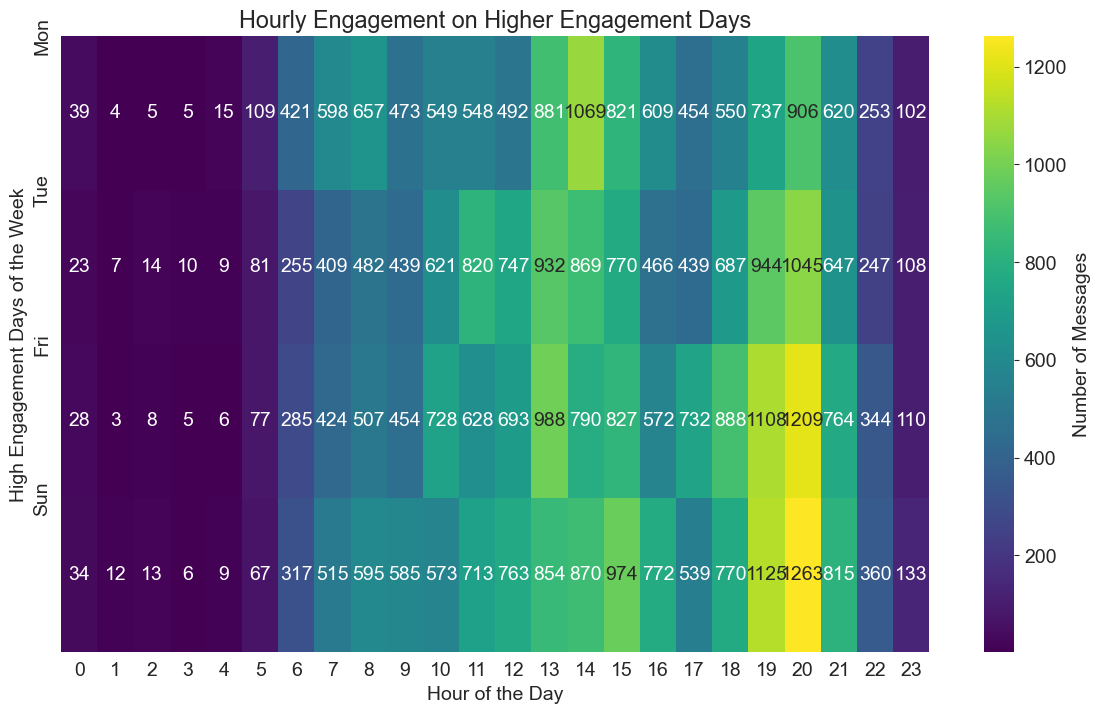

In [46]:
higher_engagement_days = [0, 1, 4, 6]  # Monday, Tuesday, Friday, Sunday
higher_engagement_data = cleaned_data[cleaned_data['day_of_week'].isin(higher_engagement_days)]

# Group data by day of the week and hour, count the number of messages
hourly_engagement_higher_days = higher_engagement_data.groupby(['day_of_week', 'hour']).size().reset_index(name='hourly_engagement')

# Visualization: Heatmap to identify peak hours on higher engagement days
plt.figure(figsize=(14, 8))
heatmap_data = hourly_engagement_higher_days.pivot('day_of_week', 'hour', 'hourly_engagement')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Messages'})
plt.title('Hourly Engagement on Higher Engagement Days')
plt.xlabel('Hour of the Day')
plt.ylabel('High Engagement Days of the Week')
plt.yticks(range(4), ['Mon', 'Tue', 'Fri', 'Sun'])
plt.show()

-- For the Hourly Engagement on Higher Engagement Days.

1. Peak Engagement Hours:

Users spend more hours of the day engaging, with peaks observed in the evening and late-night.

2. Late-Night Engagement:

Some users reply at late night, possibly when they are free from other chores.



### Analyzing Time-of-Day Engagement on Lower Engagement Days


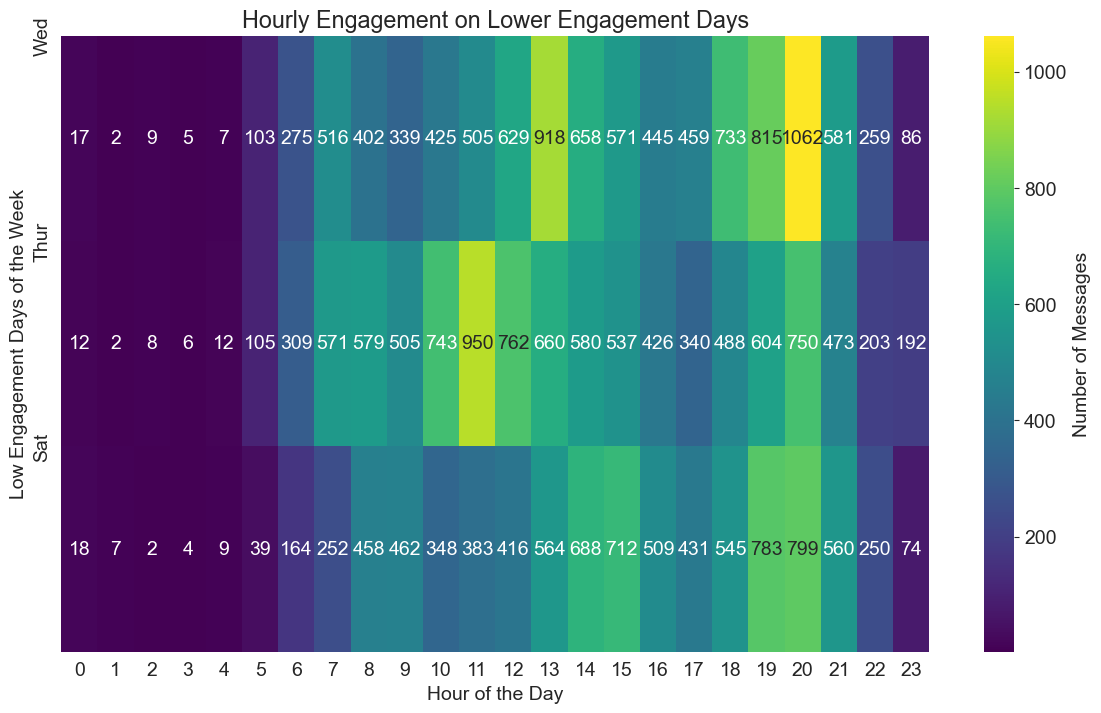

In [48]:
lower_engagement_days = [2,3,5]  # Wednesday, Thursday, Saturday
lower_engagement_data = cleaned_data[cleaned_data['day_of_week'].isin(lower_engagement_days)]

# Group data by day of the week and hour, count the number of messages
hourly_engagement_lower_days = lower_engagement_data.groupby(['day_of_week', 'hour']).size().reset_index(name='low_hourly_engagement')

# Visualization: Heatmap to identify peak hours on higher engagement days
plt.figure(figsize=(14, 8))
heatmap_data = hourly_engagement_lower_days.pivot('day_of_week', 'hour', 'low_hourly_engagement')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Messages'})
plt.title('Hourly Engagement on Lower Engagement Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Low Engagement Days of the Week')
plt.yticks(range(3), ['Wed', 'Thur', 'Sat'])
plt.show()

-- For the Hourly Engagement on Lower Engagement Days.

1. Afternoon and Evening Engagement on Lower Engagement Days:

There is observable engagement during the afternoon and evening, even on days with lower overall engagement.

2. Potential Connection to Office-Going Parents:

These time periods may be significant for parents who are occupied with work during the day. Despite lower overall engagement, these users still find time to interact during these crucial hours.

-- Recommendations for Content Posting:

1. Targeted Afternoon and Evening Content Posting:

Schedule gamified lessons during the evening hours when there is a peak in engagement. This aligns with users' availability and willingness to interact.

2. Late-Night Posting:

Consider posting content late at night for users who are active during these hours. This may capture the attention of those who prefer engaging with content after completing their daily tasks.

3. Experiment and Analyze:

Experiment with posting times and analyze the response to identify the most effective time slots for gamified lessons.

### Analyzing Message Type Preferences


In [50]:
cleaned_data["message_type"].value_counts()

Image       65477
Chat         4256
Video        3984
Voice        1071
Sticker       134
Document       24
Audio          12
Name: message_type, dtype: int64

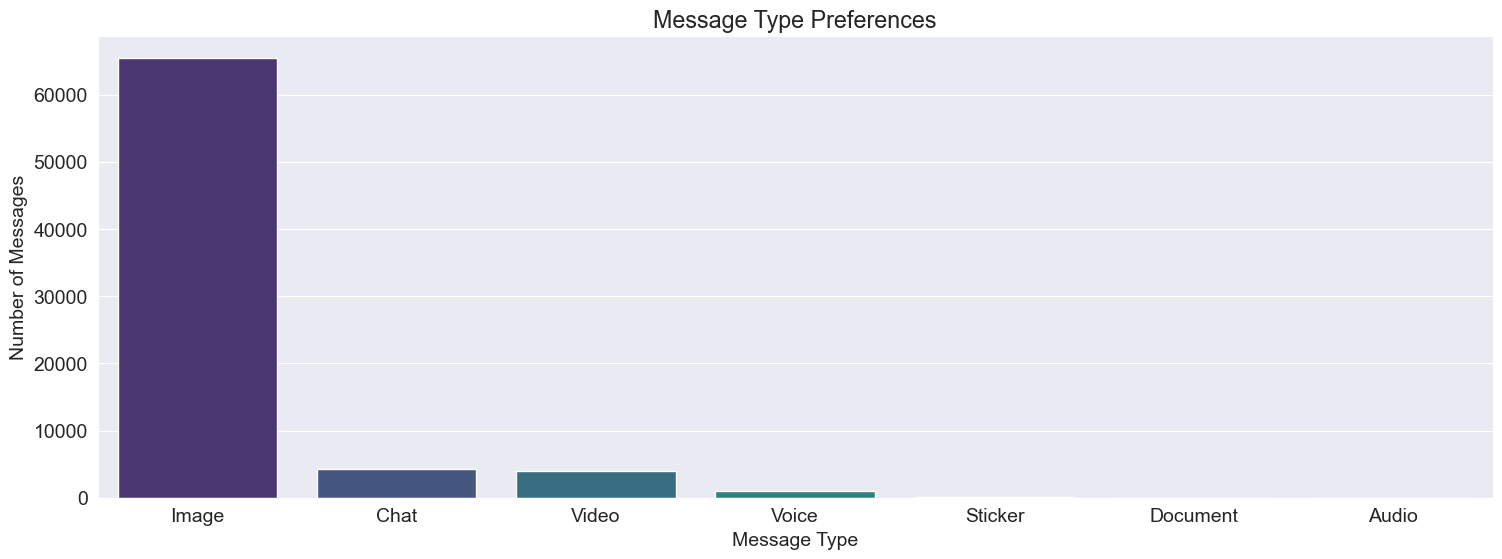

In [51]:
# Analyze Message Type Preferences
message_type_preferences = cleaned_data.groupby('message_type').size().reset_index(name='message_count')

# Sort in decreasing order
message_type_preferences = message_type_preferences.sort_values(by='message_count', ascending=False)

# Visualization: Bar Chart to Explore Message Type Preferences
sns.barplot(x='message_type', y='message_count', data=message_type_preferences, palette='viridis')
plt.title('Message Type Preferences')
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.show()

-- Here's a breakdown of conclusions made from the Visualization:

1. Most Common Message Types:

* Image: The most common message type preference with over 60K engagements.
* Chat and Video: Follow as the second and third most common message types.

2. Least Favorite Message Types:

Sticker, Document, and Audio: Identified as the least favorite message types with lower engagement.

-- Recommendations for Content Strategy:

1. Leverage Popular Types:

Capitalize on the popularity of image, chat, and video content by incorporating more of these types into daily learning activities.

2. Evaluate Low-Engagement Types:

Assess the low-engagement message types (sticker, document, audio) to understand whether there's potential for improvement or if these types can be minimized.

3. Diversify Content:

Experiment with introducing new types of content that align with the preferences of the majority of users.

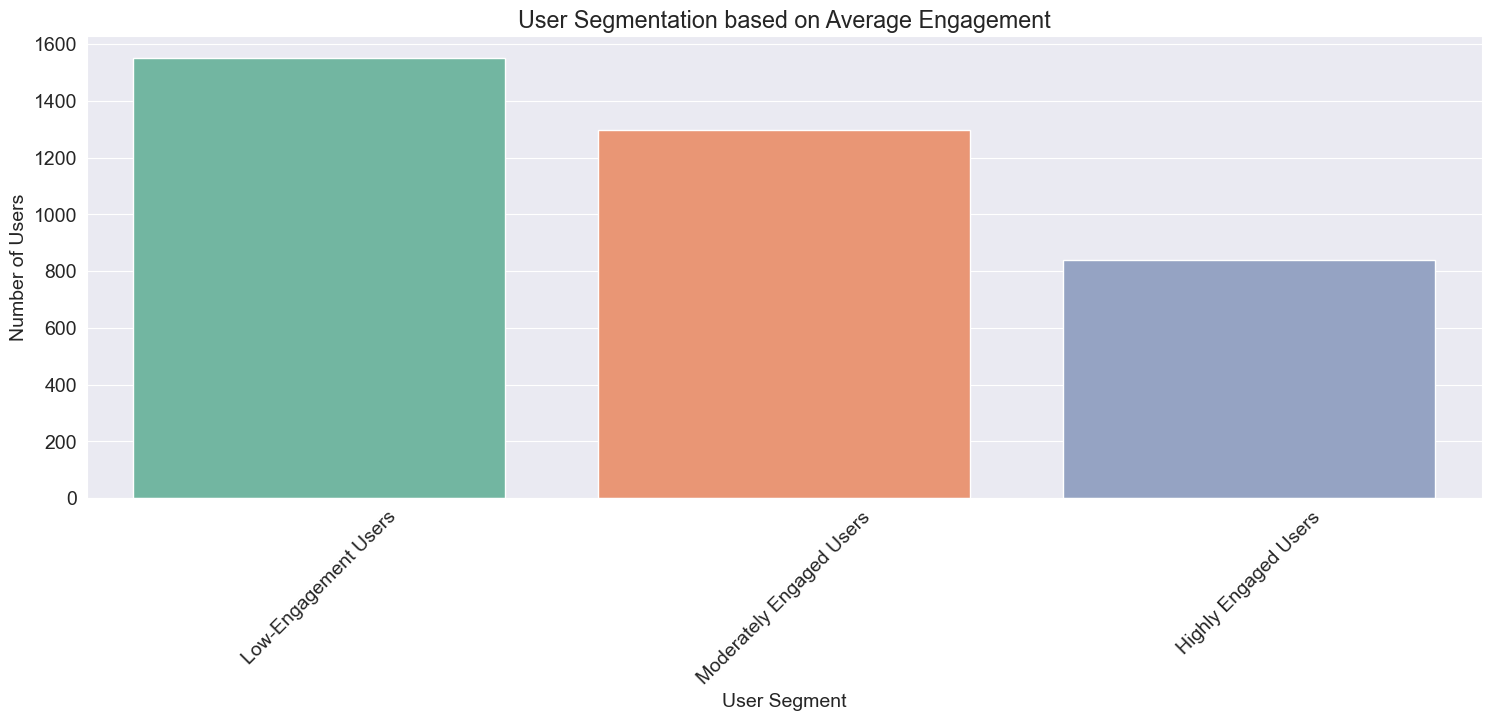

In [61]:
# Calculate Daily Engagement per User
daily_engagement_per_user = cleaned_data.groupby(['guardian_unique_id', cleaned_data['sent_time'].dt.date])['message_type'].count().reset_index(name='daily_engagement_of_user')

# Aggregate Data to Get Average Engagement per User
average_engagement_per_user = daily_engagement_per_user.groupby('guardian_unique_id')['daily_engagement_of_user'].mean().reset_index(name='average_engagement')

# Segment Users
engagement_thresholds = [average_engagement_per_user['average_engagement'].quantile(q) for q in [0.25, 0.75]]
average_engagement_per_user['segment'] = pd.cut(average_engagement_per_user['average_engagement'], 
                                                bins=[-np.inf] + engagement_thresholds + [np.inf], 
                                                labels=['Low-Engagement Users', 'Moderately Engaged Users', 'Highly Engaged Users'])

# Visualize User Segments
sns.countplot(x='segment', data=average_engagement_per_user, palette='Set2')
plt.title('User Segmentation based on Average Engagement')
plt.xlabel('User Segment')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [78]:
average_engagement_per_user

,guardian_unique_id,average_engagement,segment
0,guard_0,1.000000,Low-Engagement Users
1,guard_1,2.061538,Highly Engaged Users
2,guard_10,1.833333,Moderately Engaged Users
3,guard_100,1.000000,Low-Engagement Users
4,guard_1000,1.307692,Moderately Engaged Users
...,...,...,...
3685,guard_995,1.500000,Moderately Engaged Users
3686,guard_996,1.982456,Moderately Engaged Users
3687,guard_997,1.500000,Moderately Engaged Users
3688,guard_998,3.000000,Highly Engaged Users


In [79]:
cleaned_data["guardian_unique_id"].nunique()

3690

-- Here's conclusion made from the Visualization:

This visualization indicates that the number of users classified as lowly engaged is nearly double compared to those categorized as high-engagement users. 

In other words, a larger proportion of the user base exhibits low levels of engagement with the platform, while a smaller proportion demonstrates higher engagement. 

In [63]:
cleaned_data

,guardian_unique_id,sent_time,message_type,date,hour,day_of_week,day,month,year,is_weekend
0,guard_0,2023-01-09 17:16:43,Video,2023-01-09,17,0,9,1,2023,0
1,guard_1,2023-01-09 21:24:28,Chat,2023-01-09,21,0,9,1,2023,0
2,guard_2,2023-02-09 18:56:44,Chat,2023-02-09,18,3,9,2,2023,0
3,guard_3,2023-02-09 20:10:43,Video,2023-02-09,20,3,9,2,2023,0
4,guard_1,2023-02-09 21:09:56,Chat,2023-02-09,21,3,9,2,2023,0
...,...,...,...,...,...,...,...,...,...,...
74953,guard_1283,2023-12-31 23:03:01,Image,2023-12-31,23,6,31,12,2023,1
74954,guard_1283,2023-12-31 23:03:28,Image,2023-12-31,23,6,31,12,2023,1
74955,guard_1283,2023-12-31 23:04:25,Image,2023-12-31,23,6,31,12,2023,1
74956,guard_1283,2023-12-31 23:26:39,Image,2023-12-31,23,6,31,12,2023,1


In [68]:
# Define a date threshold for churn (30 days ago from the latest date in the dataset)
churn_threshold = cleaned_data['sent_time'].max() - pd.Timedelta(days=30)

# Create a binary variable for churned vs. active users
cleaned_data['churned'] = cleaned_data['sent_time'] < churn_threshold

# Analyze Engagement Patterns for Churned Users
churned_users = cleaned_data[cleaned_data['churned']]

# Examine engagement patterns of churned users in the weeks leading to inactivity
churned_engagement = churned_users.groupby(['guardian_unique_id', 'date']).size().reset_index(name='daily_engagement_churned')

# Compare content preferences of churned users with those who remain active
active_users = cleaned_data[~cleaned_data['churned']]
active_engagement = active_users.groupby(['guardian_unique_id', 'date']).size().reset_index(name='daily_engagement_active')

# Calculate Overall Churn Rate
overall_churn_rate = cleaned_data['churned'].mean() * 100
overall_active_rate = (~cleaned_data['churned']).mean() * 100  # Active users are those who are not churned


# Print overall churn rate
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")
print(f"Overall Active Rate: {overall_active_rate:.2f}%")


Overall Churn Rate: 81.91%
Overall Active Rate: 18.09%


This suggests that a significant majority of users in your dataset are considered churned, which means they have been inactive for the last 30 days. Only a small percentage of users are still active, which is a potential issue with user retention.

In [74]:
cleaned_data

,guardian_unique_id,sent_time,message_type,date,hour,day_of_week,day,month,year,is_weekend,churned
0,guard_0,2023-01-09 17:16:43,Video,2023-01-09,17,0,9,1,2023,0,True
1,guard_1,2023-01-09 21:24:28,Chat,2023-01-09,21,0,9,1,2023,0,True
2,guard_2,2023-02-09 18:56:44,Chat,2023-02-09,18,3,9,2,2023,0,True
3,guard_3,2023-02-09 20:10:43,Video,2023-02-09,20,3,9,2,2023,0,True
4,guard_1,2023-02-09 21:09:56,Chat,2023-02-09,21,3,9,2,2023,0,True
...,...,...,...,...,...,...,...,...,...,...,...
74953,guard_1283,2023-12-31 23:03:01,Image,2023-12-31,23,6,31,12,2023,1,False
74954,guard_1283,2023-12-31 23:03:28,Image,2023-12-31,23,6,31,12,2023,1,False
74955,guard_1283,2023-12-31 23:04:25,Image,2023-12-31,23,6,31,12,2023,1,False
74956,guard_1283,2023-12-31 23:26:39,Image,2023-12-31,23,6,31,12,2023,1,False


### Let's perform a Cross- Validation for Different Churn Thresholds

In [73]:
# Define the maximum date in the dataset
max_date = cleaned_data['sent_time'].max()

# Define a list of different time windows (in days) to sample
time_windows = [15, 30, 45, 60]

# Set a random seed for reproducibility
np.random.seed(42)

for window in time_windows:
    # Define the churn threshold based on the current time window
    churn_threshold = max_date - pd.Timedelta(days=window)

    # Create a binary variable for churned vs. active users
    cleaned_data['churned'] = cleaned_data['sent_time'] < churn_threshold

    # Calculate overall churn rate
    overall_churn_rate = cleaned_data['churned'].mean() * 100

    print(f"Churn Rate for {window}-day window: {overall_churn_rate:.2f}%")

Churn Rate for 15-day window: 88.77%
Churn Rate for 30-day window: 81.91%
Churn Rate for 45-day window: 71.53%
Churn Rate for 60-day window: 64.94%


Based on the churn rates calculated for different time windows, here are some conclusions and potential insights:

1. Critical Periods: The highest churn rate is observed in the 15-day window, indicating that a significant number of users disengage within a relatively short time. This could be a critical period for implementing retention strategies.

2. Retention Challenges: The overall churn rates are relatively high, especially for the longer time windows. This signals potential challenges in retaining user engagement over extended periods, and there may be opportunities to improve retention strategies.

3. Actionable Insights: To address the high churn rates, it's crucial to analyze user engagement patterns during these periods. Identify factors contributing to disengagement and implement targeted interventions, such as personalized content, notifications, or kid based incentives, to keep users active.

4. Continuous Monitoring: Regularly monitoring and analyzing churn rates for different time windows will help in assessing the effectiveness of implemented strategies and making data-driven adjustments to improve user retention.





**Based on the analysis of user engagement patterns and churn analysis for Rocket Learning's digital classroom platform**

#### Key Performance Indicators (KPIs) to Track:

- Daily Active Users (DAU)
- User Retention Rate
- Churn Rate
- User Satisfaction Surveys 

#### Here are some Recommendations

**1. Identify and Address Engagement Drop-offs:**

* Explore potential reasons behind these drops, such as changes in content, platform issues, or external factors.
* Implement targeted interventions to re-engage users during these critical periods.

**2. Address Churn Rate:**

* Schedule gamified lessons and content during peak engagement hours, especially at noon and evening.
* Implement retention strategies, such as personalized notifications, rewards, or content recommendations, to reduce churn rates.

**3. Experiment with Content Delivery:**

* Implement A/B testing for content delivery, posting times, and engagement strategies to continuously optimize for user preferences.
* Collect feedback from users to understand their preferences and tailor content accordingly.


**4. Segment Users for Targeted Strategies:**

* Utilize the user segmentation based on average engagement to tailor strategies for different user groups.
* Implement personalized engagement strategies for low-engagement users to increase their interaction with the platform.


Remember, these recommendations should be implemented iteratively and adjusted based on continuous analysis of user behavior and feedback. Additionally, user feedback surveys can provide valuable insights into user preferences and areas for improvement.

#### **Rocket Learning App Enhancement Plan:**

1. Content Delivery Optimization:

`Action Plan`: Analyze engagement data to determine optimal delivery times and adjust content scheduling accordingly.

`Cost`: Low

`Expected Results`: Improved engagement during peak hours, leading to increase in DAU.

2. Tailoring Content Based on Message Type Preferences:

`Action Plan`: Identify popular message types, create tailored content, and implement content delivery adjustments.

`Cost`: Moderate

`Expected Results`: Enhanced user satisfaction, increase in engagement for tailored content.

3. Enhancing Weekly Engagement Strategies:

`Action Plan`: Analyze weekly engagement patterns, plan targeted content for high-engagement days, and potentially introduce new features.

`Cost`: Moderate

`Expected Results`: Consistent engagement across the week, with increase in overall weekly user activity.

4. User Segmentation for Personalized Engagement:

`Action Plan`: Utilize insights from user segmentation analysis, personalize communication, and implement tailored engagement strategies.

`Cost`: Moderate

`Expected Results`: Improved user retention, increase in engagement among targeted segments.

5. Churn Mitigation Strategies:

`Action Plan`: Identify factors contributing to churn, implement targeted interventions, and measure effectiveness.

`Cost`: Moderate to High

`Expected Results`: Reduced churn rate, leading to a more stable user base.

6. Continuous Monitoring and Iteration:

`Action Plan`: Implement monitoring tools, analyze real-time data, and iterate strategies based on ongoing insights.

`Cost`: Low

`Expected Results`: Agile response to user behavior, ensuring sustained engagement and satisfaction.


This comprehensive plan aims to not only address current engagement challenges but also lay the groundwork for sustainable growth and user satisfaction, after the discussion with the stakeholders. Regular reviews and adjustments will be critical to ensure alignment with real-time performance data and user feedback.


### Scope of Improvement (in this Assignment depending upon better dataset): 

1. Content Relevance:
Analysis: Evaluate the engagement based on the relevance of content delivered.
Rationale: Ensure that content aligns with user interests and educational needs.
2. Interactive vs. Passive Content:
Analysis: Differentiate engagement patterns for interactive (e.g., gamified) and passive content.
Rationale: Understand if interactive elements contribute to sustained engagement.
3. User Journey Analysis:
Analysis: Map the user journey from initial engagement to churning.
Rationale: Identify critical touchpoints where interventions or improvements can be made.
